<a href="https://colab.research.google.com/github/jae-hyuck/dl13/blob/main/project/dl13_proj02_XOR_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XOR problem
## numpy with back propagation
## MLP
- 1-hidden layer
- 2 hidden-layers
- hyperparameter setting

In [15]:
# numpy - bak propagation with iterations=20000
import numpy as np
# XOR solution by MLP

# 시그모이드 함수
def actf(x):
	return 1/(1+np.exp(-x))

# 시그모이드 함수의 미분치
def actf_deriv(x):
	    return x*(1-x)

# 입력유닛의 개수, 은닉유닛의 개수, 출력유닛의 개수
inputs, hiddens, outputs = 2, 2, 1
learning_rate = 0.5

# 훈련 입력과 출력
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # (4,2)
T = np.array([[0], [1], [1], [0]])              # (4,1)

# 가중치를 –1.0에서 1.0 사이의 난수로 초기화한다.
W1 = 2*np.random.random((inputs, hiddens))-1    # (2,2)
W2 = 2*np.random.random((hiddens, outputs))-1   # (2,1)
B1 = np.zeros(hiddens)                          # (2,)
B2 = np.zeros(outputs)                          # (1,)
print(W1.shape,W2.shape,B1.shape,B2.shape)

# 순방향 전파 계산
def predict(x):
        layer0 = x			# 입력을 layer0에 대입한다. 
        Z1 = np.dot(layer0, W1)+B1	# 행렬의 곱을 계산한다. 
        layer1 = actf(Z1)		# 활성화 함수를 적용한다. 
        Z2 = np.dot(layer1, W2)+B2	# 행렬의 곱을 계산한다. 
        layer2 = actf(Z2)		# 활성화 함수를 적용한다. 
        return layer0, layer1, layer2
    
# 역방향 전파 계산
def fit():
    global W1, W2, B1, B2
    for i in range(50000):
            layer0, layer1, layer2 = predict(X) # input-batch-size = 4
            layer2_error = layer2-T
            # print(layer0.shape,layer1.shape,layer2.shape)
            
            layer2_delta = layer2_error*actf_deriv(layer2)
            layer1_error = np.dot(layer2_delta, W2.T)
            layer1_delta = layer1_error*actf_deriv(layer1)
            # print(layer2_error.shape)
            # print(layer2_delta.shape)
            # print(layer1_error.shape)
            # print(layer1_delta.shape)
            
            W2 += -learning_rate*np.dot(layer1.T, layer2_delta)/4.0  # 4개의 입력에 대한 평균 기울기
            W1 += -learning_rate*np.dot(layer0.T, layer1_delta)/4.0
            B2 += -learning_rate*np.sum(layer2_delta, axis=0)/4.0
            B1 += -learning_rate*np.sum(layer1_delta, axis=0)/4.0

def test():
    for x, y in zip(X, T):
        x = np.reshape(x, (1, -1))		# 하나여도 2차원 형태이어야 한다.
        layer0, layer1, layer2 = predict(x)
        print(x, y, layer2)

fit()
test()

(2, 2) (2, 1) (2,) (1,)
[[0 0]] [0] [[0.01546279]]
[[0 1]] [1] [[0.98534376]]
[[1 0]] [1] [[0.9823904]]
[[1 1]] [0] [[0.01377463]]


> ### Dose numpy with back propagation solve XOR problem?

In [ ]:
# Keras MLP with 1 hidden layer, epochs=2000
import numpy as np
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=2, input_shape=(2,), activation='sigmoid')) #
model.add(tf.keras.layers.Dense(units=1,  activation='sigmoid')) #
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.SGD(lr=0.1)) 

model.summary()
 
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X, y, batch_size=1, epochs=2000, verbose=2)

print(model.predict(X))



> ### Not good result

In [ ]:
# # Keras MLP with 2 hidden layers and epochs=2000
import numpy as np
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=16, input_shape=(2,), activation='relu')) #①
model.add(tf.keras.layers.Dense(units=8, activation='relu')) #
model.add(tf.keras.layers.Dense(units=1,  activation='sigmoid')) #		
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.SGD(lr=0.1)) 

model.summary()

X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X, y, batch_size=1, epochs=2000, verbose=2)

print(model.predict(X))



---
---

## [DIY] Hyperparameter control
- Find the optimal training condition with epoches=2000

> ## Try Bard, ChatGPT, Bing AI
- ### Write a MLP code to solve XOR using Keras.

---

In [ ]:
# xor문제를 해결하는 mlp모델 

In [7]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the input and target data
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

# Train the model
model.fit(X, y, epochs=2000, verbose=0)

# Test the model
print(model.predict(X))


1/1 [==============================] - 0s 99ms/step
[[0.08542434]
 [0.9834731 ]
 [0.9685921 ]
 [0.01623694]]


In [8]:
# 재확인
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the input and target data
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

# Train the model
model.fit(X, y, epochs=2000, verbose=0)

# Test the model
print(model.predict(X))


1/1 [==============================] - 0s 70ms/step
[[0.07772348]
 [0.93860304]
 [0.9330119 ]
 [0.06098547]]


1/1 [==============================] - 0s 71ms/step
[[0.0380545 ]
 [0.973411  ]
 [0.9683425 ]
 [0.02661308]]


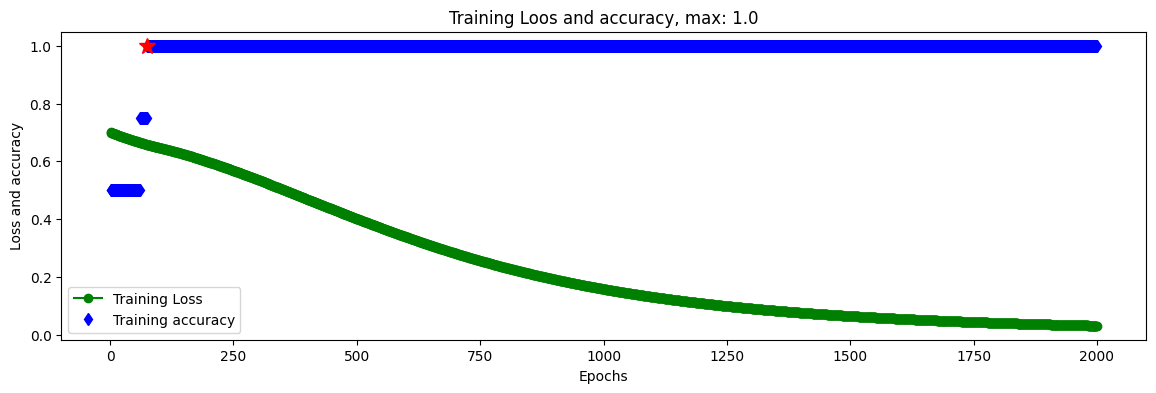

In [11]:
import matplotlib.pylab as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the input and target data
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

# Train the model
history = model.fit(X, y, epochs=2000, verbose=0)

history_dict = history.history 
loss = history_dict['loss']
accuracy = history_dict['accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,1,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, accuracy, 'bd', label='Training accuracy')
plt.plot(np.argmax(np.array(accuracy))+1,accuracy[np.argmax(np.array(accuracy))], 'r*', ms=12)
plt.title('Training Loos and accuracy, max: ' + str(np.round(accuracy[np.argmax(np.array(accuracy))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss and accuracy')
plt.legend()

# Test the model
print(model.predict(X))


1/1 [==============================] - 0s 108ms/step
[[0.08074582]
 [0.9692805 ]
 [0.9704669 ]
 [0.02954831]]


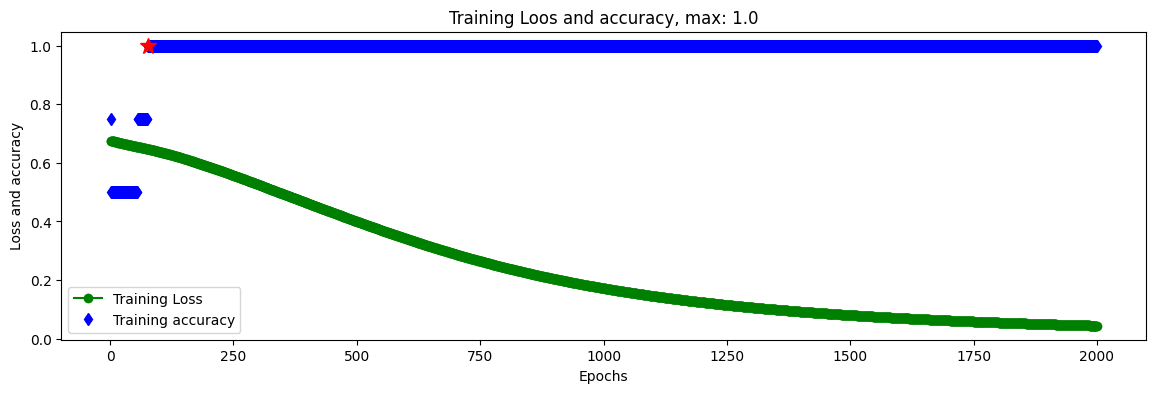

In [14]:
import matplotlib.pylab as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the input and target data
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

# Train the model
history = model.fit(X, y, epochs=2000, verbose=0)

history_dict = history.history 
loss = history_dict['loss']
accuracy = history_dict['accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,1,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, accuracy, 'bd', label='Training accuracy')
plt.plot(np.argmax(np.array(accuracy))+1,accuracy[np.argmax(np.array(accuracy))], 'r*', ms=12)
plt.title('Training Loos and accuracy, max: ' + str(np.round(accuracy[np.argmax(np.array(accuracy))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss and accuracy')
plt.legend()

# Test the model
print(model.predict(X))


Epoch 1/1000
1/1 [==============================] - 0s 496ms/step - loss: 0.2383 - accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2379 - accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2374 - accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2370 - accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2366 - accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2362 - accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2357 - accuracy: 0.7500
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2353 - accuracy: 0.7500
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2349 - accuracy: 0.7500
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2345 - accuracy: 0.7500
Epoch 11/10

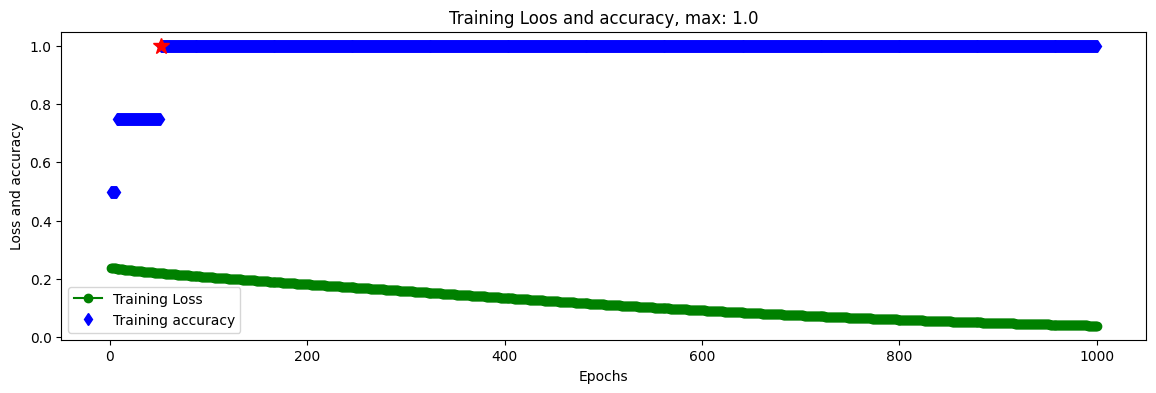

In [19]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Define the XOR problem dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Define the MLP model
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=1000, batch_size=4)

history_dict = history.history 
loss = history_dict['loss']
accuracy = history_dict['accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,1,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, accuracy, 'bd', label='Training accuracy')
plt.plot(np.argmax(np.array(accuracy))+1,accuracy[np.argmax(np.array(accuracy))], 'r*', ms=12)
plt.title('Training Loos and accuracy, max: ' + str(np.round(accuracy[np.argmax(np.array(accuracy))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss and accuracy')
plt.legend()

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy*100:.2f}%")

# Make predictions
predictions = model.predict(X)
print(predictions.round())
